# Sentiment Analysis of Silverlake Ramen Yelp Reviews

## From fillings, to text, to feelings!

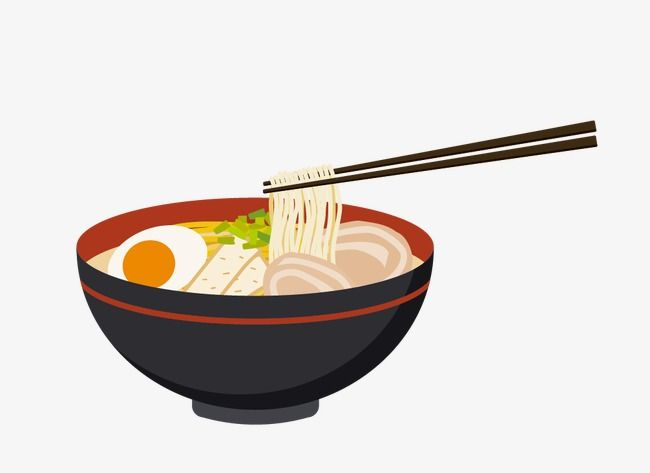

## Description

 Learning to scrape data has opened numerous doors for me. As a yelp user I am curious to see how my local ramen joint was doing. In this project I explore reviews and see how they translate into feelings using sentiment analysis. 
 
 _*This project is aimed at gaining insights from a analytics and educational standpoint and not a machine learning or predictive one._

### Questions in mind

- **Besides "ramen", what other words come up most often?**
- **What do the reviews say in terms of sentiment?**
- **From these reviews, what does the positive vs negative sentiment look like?**
- **Are there any combinations of words that stand out?**
- **From these reviews how many are actually updating?**
- **From these reviews how many are related to online delivery or COVID/quarantine?**



 

### 1. Setting Up Our Workstation and Load in Libraries, Yarimasho!

   Before we begin lets load in relevant packages.

In [1]:

library(tidyverse)
library(tidytext)
library(textdata)
library(wordcloud)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'tidytext' was built under R version 3.6.3"Warning message:
"package 'textdata' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


### 2. Importing Our Data 

Here we retrieve our data I've saved in Github (post web scraping).


In [2]:
# We read the dataset from github 
url <- "https://raw.githubusercontent.com/Rlegaspi562/Visualization-of-Sentiment-Analysis-of-Yelp-reviews/master/silverlakeramenyelp_dataset.csv"
yelp <- read_csv(url)

# Checking data
str(yelp)
head(yelp)
glimpse(yelp)

Parsed with column specification:
cols(
  Reviews = col_character()
)


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	315 obs. of  1 variable:
 $ Reviews: chr  "Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more." "Start your review of Silverlake Ramen." "I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always sl"| __truncated__ "I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only o"| __truncated__ ...
 - attr(*, "spec")=
  .. cols(
  ..   Reviews = col_character()
  .. )


Reviews
"Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more."
Start your review of Silverlake Ramen.
I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.
"I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well! Needless to say, I'll definitely be back."
"Hi Bianca, I’m thrilled to see that you enjoyed your meal. Take care!"
"I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. My family and I love Silverlake Ramen, double thumbs up."


Observations: 315
Variables: 1
$ Reviews <chr> "Your trust is our top concern, so businesses can't pay to ...


### 3. Data Cleaning Using Tidy Principles: Entering the Tidyverse

In addition to reformatting our data to fit tidy principles, I will be
__ommitting some rows in the dataset__ because after reading the yelp data and due to the webscraping process, I notice that some observations are actually business owner replies and are being counted as additional observations themselves. Fortunately, since the dataset is fairly manageable I can go through and __remove business owner replies, duplicates, and any other text that are not reviews__.

#### 3a. Cleaning our data

In [3]:
# Removing business owner replies, yelp headings, and extra text.
yelp <- yelp[ -c(1, 2, 5, 7, 10, 23, 28, 29, 37, 40, 47, 56, 72, 79, 80, 93, 102, 103, 121, 126, 127, 128, 131, 151, 152, 162, 174, 175, 176, 193, 198, 199, 200, 219, 222, 223, 237, 246, 247, 268, 269, 283, 285, 292, 293, 304, 311) , ]

In [26]:

# Turning yelp data into a tibble format (data frame)
yelp_tibble <- as_tibble(yelp)

# Checking class to confirm
class(yelp_tibble)

# Removing duplicate rows 
yelp_tibble %>% distinct(value, .keep_all = TRUE) %>%
head()

# Print
glimpse(yelp_tibble)


[1] "tbl_df"     "tbl"        "data.frame"

Warning message:
"Trying to compute distinct() for variables not found in the data:
- `value`
This is an error, but only a warning is raised for compatibility reasons.
The operation will return the input unchanged."

Reviews
I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.
"I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well! Needless to say, I'll definitely be back."
"I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. My family and I love Silverlake Ramen, double thumbs up."
"Eh, it's ok if you're craving ramen but feeling too lazy to drive to Irvine or Torrance for proper ramen.Ordered The Blaze, spicy with pork. Wow, it came out in a comically huge bowl. Looks like a giant lake of broth with a little island in the middle made of noodles and spinach. The presentation just looks sparse and weird. Speaking of weird, the spinach was unexpected. I can't recall ever seeing spinach at any other ramen place. It just didn't add anything to the dish. Just a soggy green thing floating in your bowl. And there was one piece of sea weed clinging to the side of the bowl, far away from the noodle island. Again, strange sparse presentation. The noodles were average. The pork was super tender and was braised or blow torched to give it a slight crust. The broth was ""ok"" at first. But towards the end, I grabbed a spoon and slurped it up. I noticed a strange aftertaste. Not very pleasant. Also ordered the chicken karaage bowl. When it arrived at my table, it was covered in so many things. Again, not what you'd find at a traditional ramen place. I'll admit the actual chicken was great. Meat was tender and had the right deep fried crispiness. But the rock-n-roll mayo and terriyaki sauce ruined it. I highly suggest ordering it with sauces on the side. Also comes with a shredded pickled daikon as a garnish. It's really tangy. I don't hate it, but I could do without it.So now let's talk about the weird workflow. You walk in. You see one person at the register, and you see these giant tablets on the wall where you can self-order and pay with card. You ask yourself.. if you know what you want and you want to pay by card, do you cut ahead of everyone else in the line and punch in your order? Or do you wait in line and wait til you're face to face to the tablet? Well, I observed people doing both. I saw some confusing faces, as well as angry faces from people waiting in line. This is just a terrible idea, especially since not everyone was eager to use the giant tablet, even though they were paying by card at the register.Next, after you order and pay, you wait for someone to seat you. During peak hours, this is even more terrible idea. Because sometimes people eat slow and it takes a while for an empty table to come up. But since you've already paid, you're stuck. You can't just bounce to some other places to eat if the wait is too long.Prices are on par with other ramen places. If you think it's expensive, then you need to stick to the 25 cent Top Ramen you get at the store. I think karaage bowl is a great deal. You get a good amount of chicken and rice for the price. It's a meal in itself.Overall, not a bad place but not my first first choice either. I might go back and try their other items. But I wasn't impressed with their Blaze ramen and the weird workflow."
"Very hip, very modern, very cool. I like it. The menu has a great mix of fresh, fried, and flavorful soup options. My guy had the more lighter broth ramen made with chicken, I had the ground chicken

Observations: 268
Variables: 1
$ Reviews <chr> "I have been here at least 3 times to dine in person. Hospi...


#### 3b. Tokenization

By performing tokenization, we essentially __transform our tibble dataset into a data frame of one word per row__. This will help ease the process of analyzing sentiment much easier by having our dataset in  this format. 

In [5]:

# Tokenization (unnesting) in preparation for sentiment analysis (inner_join) to transform nontidy text data into tidy text data
tidy_yelp <- yelp_tibble %>%
  unnest_tokens(word, Reviews)

# Removing stopwords from our tidy_yelp dataset that are extremely common e.g. is, of, a, etc...
data("stop_words")
tidy_yelp <- tidy_yelp %>%
  anti_join(stop_words) 

# Checking
head(tidy_yelp)

Joining, by = "word"


word
3
times
dine
person
hospitality
excellent


## 4. Output & Visualizations

### 4a.  Most Common Words: Wordcloud

To start off, lets create an aesthetically pleasing wordcloud that illustrates the top 50 words in our dataset.

Joining, by = "word"


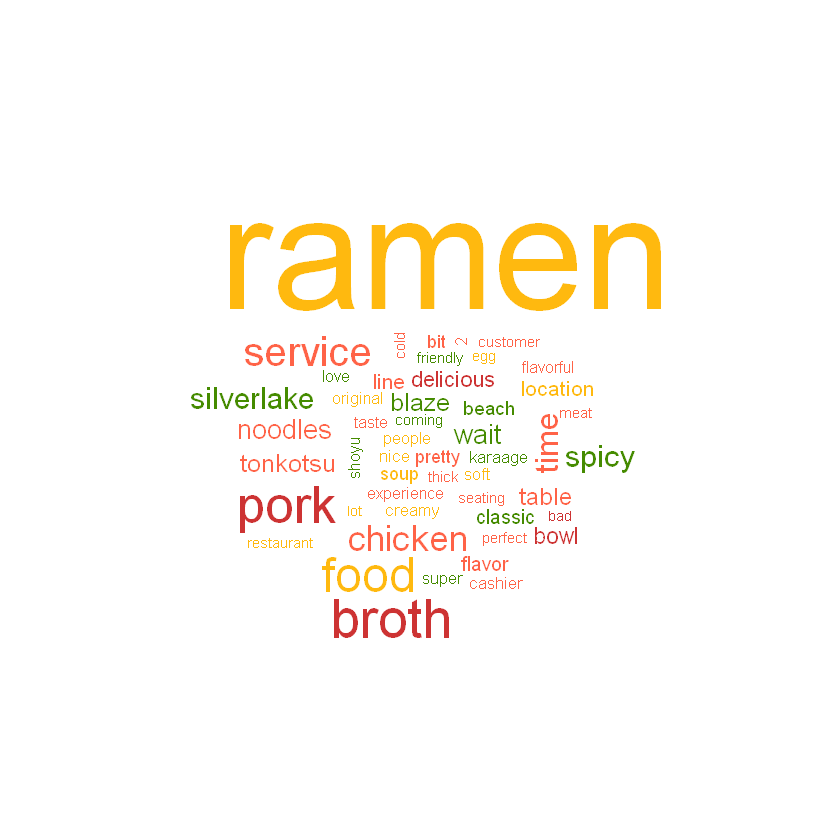

In [6]:

  #top 50 wordcloud
  tidy_yelp %>% 
    anti_join(stop_words) %>%
    count(word) %>%
    with(wordcloud(word,
                   freq = n,
                   scale=c(8,.3),
                   max.words = 50,
                   random.color = TRUE,
                   colors = c("brown3", "darkgoldenrod1", "tomato", "chartreuse4")))
  

### 4b. Most Common Words: Stacked Bar Chart

Did some searching on the table and turns out the word update comes up 6 times, so out of 268 reviews, roughly 2% update?


word,n
ramen,513
broth,159
pork,153
food,141
service,115
chicken,101
time,85
spicy,84
silverlake,81
noodles,69


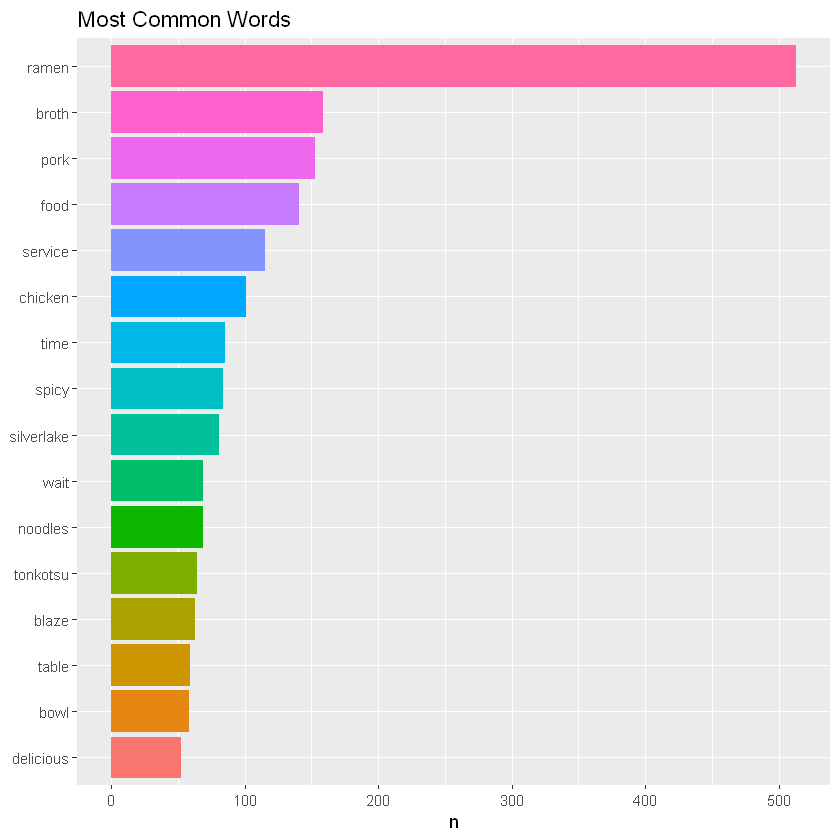

In [28]:

# Output of most common words
tidy_yelp %>% 
  count(word, sort = TRUE)
 
# Visual
tidy_yelp %>% 
  count(word, sort = TRUE) %>%
  filter(n > 50) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y = n, fill = word)) +
  geom_col() +
  xlab(NULL) +
  ggtitle("Most Common Words") +
  theme(legend.position="none") +
  coord_flip()


### 4c.  Positive vs Negative Sentiment 

Here we introduce sentiment. But to do so, we first have to introduce **"lexicons"** to understand how these words are categorized by a "sentiment". There are different kinds of lexicons. __We can think of these lexicons as a kind of dictionary__. One of which is the "bing" lexicon that we will be using. When the "bing" lexicon is applied with our text set it will __indicate whether a word is positive or negative__.  

In [8]:
# Implementing sentiment analysis
silverlake_bing_sentiment <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) 


# Output
silverlake_bing_sentiment 

Joining, by = "word"


word,sentiment
excellent,positive
slow,negative
impressed,positive
delightfully,positive
fresh,positive
perfection,positive
top,positive
delicious,positive
delicious,positive
needless,negative


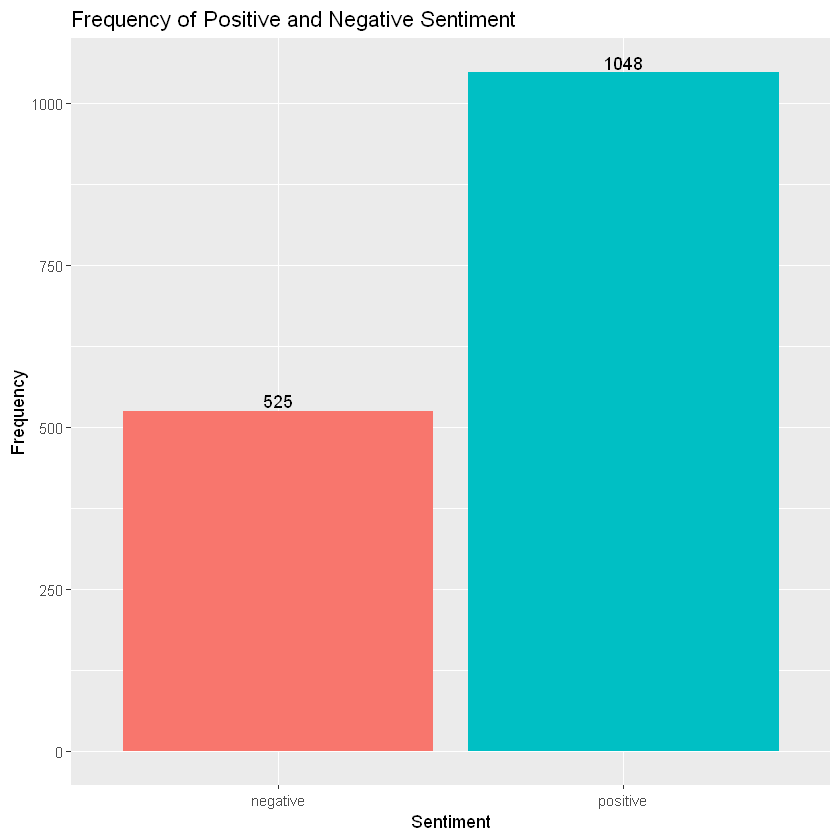

In [9]:
# Creating the visual
silverlake_bing_sentiment_bar <- silverlake_bing_sentiment %>% 
  count(sentiment) %>%

# Piping our previous output into a neat barchart to visualize
ggplot(aes(x = sentiment, y = n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  xlab("Sentiment") +
  ylab("Frequency") +
  ggtitle("Frequency of Positive and Negative Sentiment") +
  geom_text(aes(label = n), position = position_dodge(width = 0.9), vjust = -0.25)

# Printing
silverlake_bing_sentiment_bar


### 4d. Digging Deeper: What Words Contribute to Each Positive/Negative Sentiment?

Joining, by = "word"


word,sentiment,n
delicious,positive,52
classic,positive,46
pretty,positive,39
soft,positive,36
nice,positive,35
super,positive,35
love,positive,32
cold,negative,29
friendly,positive,29
perfect,positive,29


Selecting by n


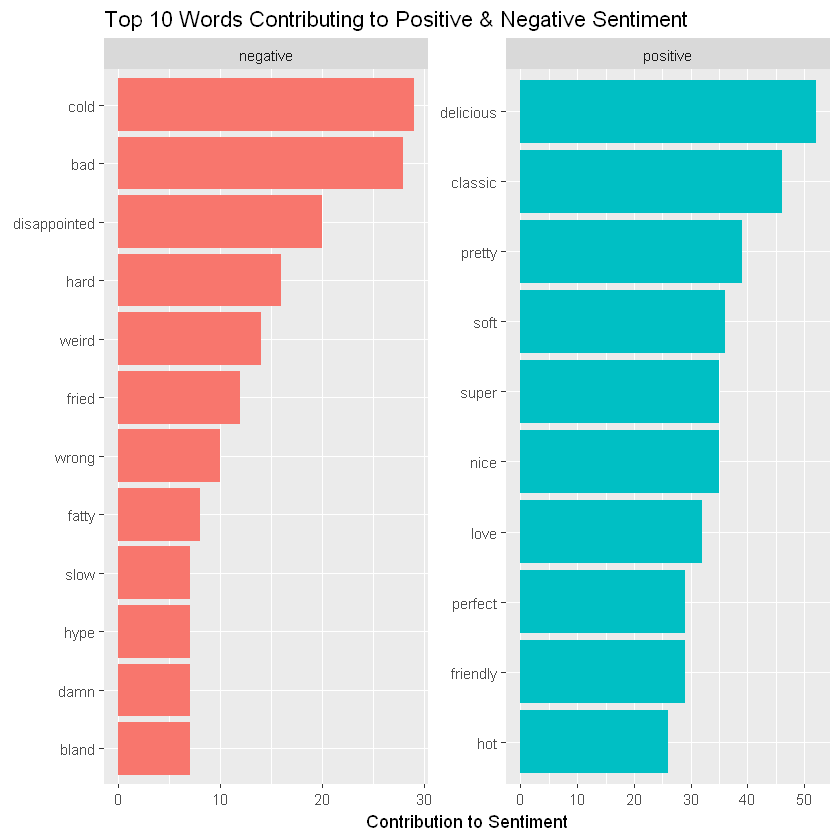

In [10]:

# In this line of code we add our custom stop words 
yelp_bing_counts <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

# Output of words with respective sentiment and frequency
yelp_bing_counts

# Visual
yelp_bing_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y = n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free") +
  labs(y = "Contribution to Sentiment",
       x = NULL) +
  ggtitle("Top 10 Words Contributing to Positive & Negative Sentiment") +
  coord_flip()


#### Removing Anamolies in Our Analysis

Immediately after looking through the bar charts we see some __words being mistaken for the wrong sentiment__. These words: **fried, fatty, damn, and classic/blaze (item names on the menu)**, are words that __are neutral__ in a restaurant setting and can definitely be taken out of context in our visual so lets remove them. Lets also appreciate how the "bing" lexicon correctly identifies the word "cold" as negative and "hot" as positive, which is perfectly suitable in this case!

In [11]:
# We will create our own custom stop words
custom_stop_words1 <- bind_rows(tibble(word = c("fried", "damn", "hype", "classic", "blaze"), 
                                          lexicon = c("custom")), 
                               stop_words)

head(custom_stop_words1)

word,lexicon
fried,custom
damn,custom
hype,custom
classic,custom
blaze,custom
a,SMART


Joining, by = "word"
Joining, by = "word"


Observations: 417
Variables: 3
$ word      <chr> "delicious", "pretty", "soft", "nice", "super", "love", "...
$ sentiment <chr> "positive", "positive", "positive", "positive", "positive...
$ n         <int> 52, 39, 36, 35, 35, 32, 29, 29, 29, 28, 26, 24, 24, 22, 2...


Selecting by n


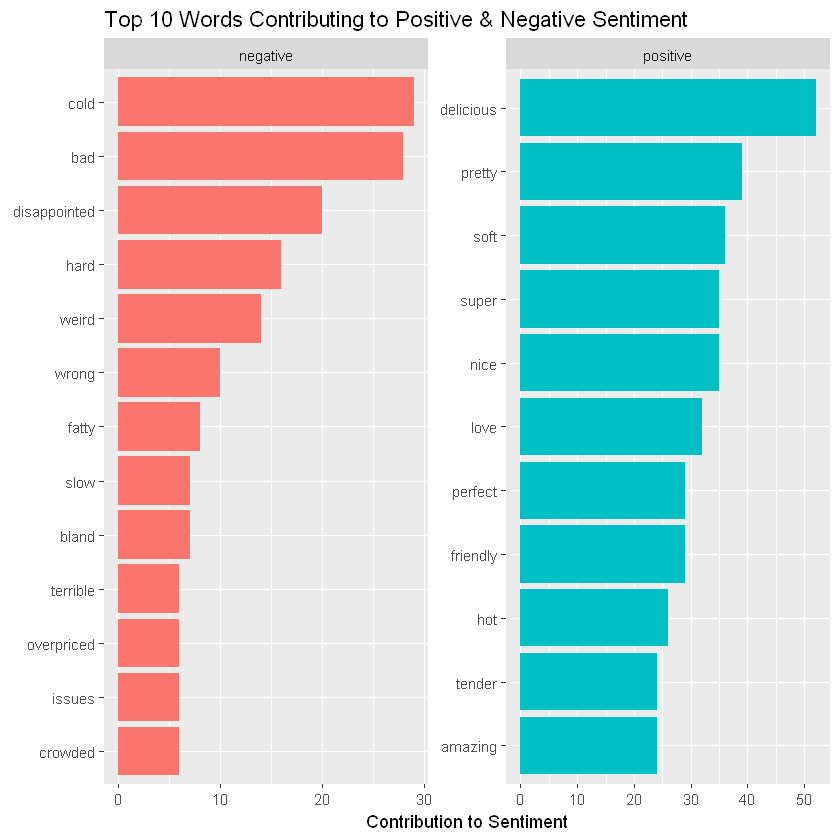

In [12]:
# Here are our new updated outputs and visuals!

# In this line of code we add our custom stop words
yelp_bing_counts <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) %>%
  anti_join(custom_stop_words1) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

# Print our new updated output
glimpse(yelp_bing_counts)

# Visual
  yelp_bing_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y = n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free") +
  labs(y =  "Contribution to Sentiment",
       x = NULL) +
  ggtitle("Top 10 Words Contributing to Positive & Negative Sentiment") +
  coord_flip()



#### Great! Now these words make much more sense in their respective sentiments.

### 4e. Categorizing Emotion

In this visual, we will be displaying 6 emotions (__anticipation, joy, sadness, disgust, anger, and surprise__) using the **"nrc" lexicon**. Let us also filter out the trust/fear and positive/negative sentiments because it is also hard to truly gauge fear and trust with single text. Positive/negative sentiments will be filtered out because it has already been analyzed using the "bing" lexicon previously. 

In [13]:
# Adjusting the "nrc" lexicon before implementation
 drop_sentiments <- c("fear", "trust", "positive", "negative")
 new_nrc <- get_sentiments("nrc") %>% 
filter(!sentiment %in% drop_sentiments)

# Print to check
head(new_nrc)

# Future me sees the data and needs to adjust
# Therefore we create our second custom stop words because these words either fit in the wrong emotion or are neutral
custom_stop_words2 <- bind_rows(tibble(word = c("food", "blaze", "yelp", "fatty", "damn","beach", "mouth", "deal", "pretty", "black", "tough", "chance", "mouth", "deal", "hope", "guess", "finally", "chicken", "serve", "feeling", "music", "leave", "bomb", "shopping", "perfect", "hot", "kick", "food"), 
                                          lexicon = c("custom")), 
                               stop_words)
# Print to check
head(custom_stop_words2)

word,sentiment
abandon,sadness
abandoned,anger
abandoned,sadness
abandonment,anger
abandonment,sadness
abandonment,surprise


word,lexicon
food,custom
blaze,custom
yelp,custom
fatty,custom
damn,custom
beach,custom


Joining, by = "word"
Joining, by = "word"


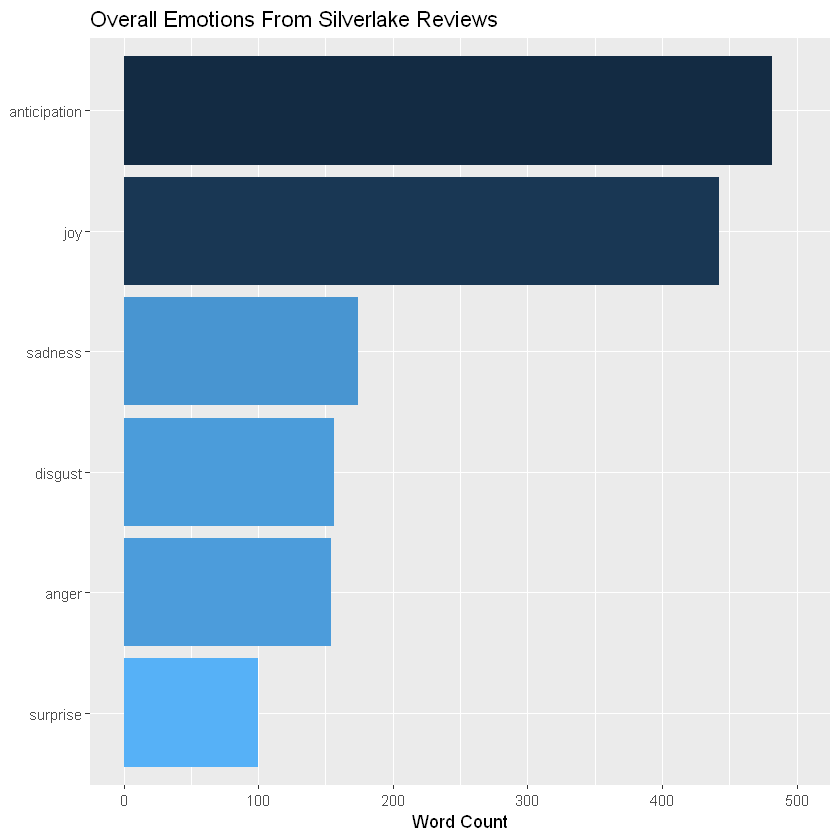

In [14]:

# Implement sentiment analysis using our "new_nrc" lexicon 
 yelp_nrc <- tidy_yelp %>%
    inner_join(new_nrc) %>%
    anti_join(custom_stop_words2)
  
  
  yelp_nrc_plot <- yelp_nrc %>%
    group_by(sentiment) %>%
    summarise(word_count = n()) %>%
    ungroup() %>%
    mutate(sentiment = reorder(sentiment, word_count)) %>%
    
# Creating our visual
    ggplot(aes(sentiment, word_count, fill = -word_count)) +
    geom_col() +
    guides(fill = FALSE) + 
    labs(x = NULL, y = "Word Count") +
    scale_y_continuous(limits = c(0, 500)) + 
    ggtitle("Overall Emotions From Silverlake Reviews") +
    coord_flip()
  
  yelp_nrc_plot

#### Looks like _"anticipation"_ and _"joy"_ is in the air!

### 4f. Top Words Contributing to Each Respective Emotion

Again, digging a bit deeper, lets see what the top 3 words contributing to each respective emotion are. 

Joining, by = "word"
Joining, by = "word"
Selecting by n


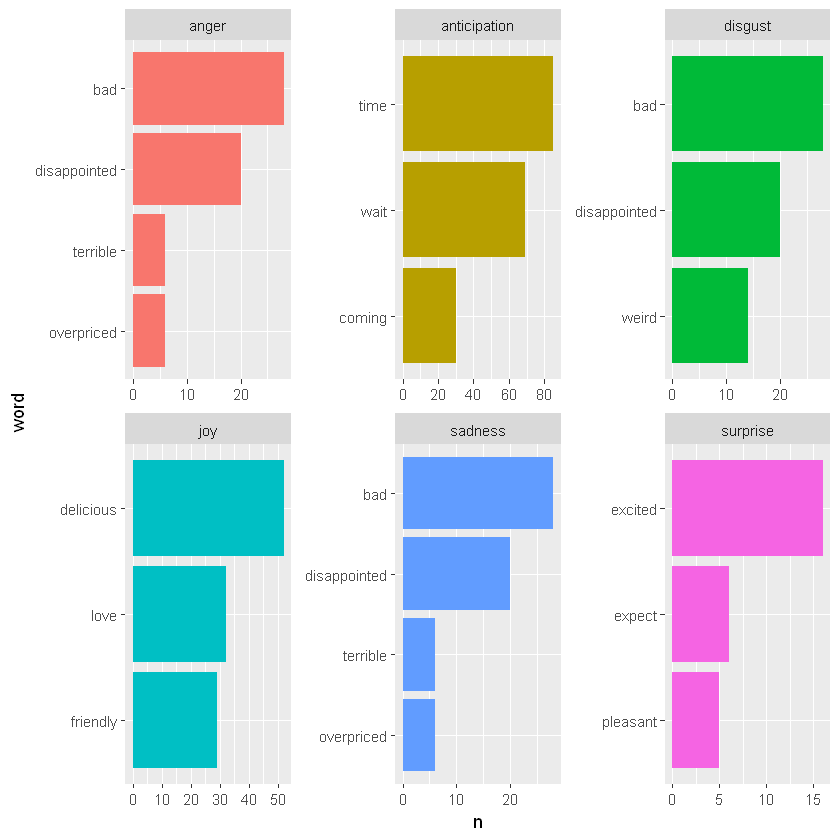

In [15]:

# Implementing sentiment analysis
  yelp_nrc <- tidy_yelp %>%
    inner_join(new_nrc) %>%
    anti_join(custom_stop_words2)
    
  
# Which words contribute to the sentiment scores?
  yelp_nrc  %>%
    count(word, sentiment) %>%
    group_by(sentiment) %>%
    top_n(3) %>%
    ungroup() %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(x = word, y = n, fill = sentiment)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ sentiment, scales = "free") +
    coord_flip()

## 6. Looking at the Relationships of Words

Looking at single words alone might not be entirely helpful. __Using pairs of words__ for analysis will help give us more context 
of reviews.
Similar to tokenizations, we will be using something called "__tokens = ngrams__". This will allow us to categorize our data by "n" many words per row and __see how often word X is followed by word Y__.

### 6a. Lets look at pairs of words: Bigrams

In [16]:
#implementing tokenization at the bigram level
silverlake_bigrams <- yelp_tibble %>%
unnest_tokens(bigram, Reviews, token = "ngrams", n = 2)

# Printing bigrams
silverlake_bigrams %>%
  count(bigram, sort = TRUE)

# A tibble: 29,073 x 1
   bigram   
   <chr>    
 1 i have   
 2 have been
 3 been here
 4 here at  
 5 at least 
 6 least 3  
 7 3 times  
 8 times to 
 9 to dine  
10 dine in  
# ... with 29,063 more rows


bigram,n
it was,127
and the,111
in the,84
to the,83
of the,82
this place,78
the broth,72
the ramen,70
and i,66
on the,61


As expected, we can see that most words that follow, or precede each other are __stop_words__ which do not provide much insight. Lets remove these.


In [17]:

# Creating new columns for word 1 and word 2
bigrams_separated <- silverlake_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

# Filtering our stop_words
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)

# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)

# Dynamic data table
bigram_counts 


word1,word2,n
silverlake,ramen,51
pork,belly,25
tonkotsu,ramen,25
chicken,karaage,24
customer,service,23
spicy,tonkotsu,20
blaze,ramen,16
pork,bun,16
classic,tonkotsu,14
tonkatsu,ramen,12


### Visualizing Bigrams

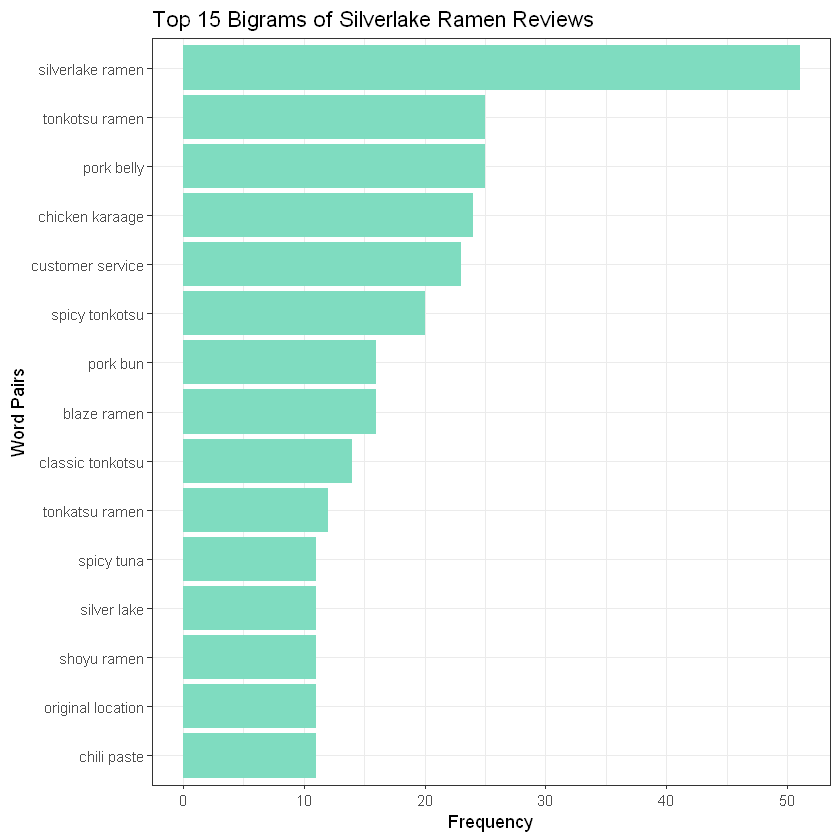

In [18]:
# Visual of Bigrams  
bigrams_separated %>% 
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>% 
  unite(word,word1, word2, sep = " ") %>% 
  count(word, sort = TRUE)  %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  slice(1:15) %>%
  ggplot() + 
  geom_bar(aes(word, n), stat = "identity", fill = "#7FDCC0") +
  theme_minimal() +
  theme_bw() +
  coord_flip() +
  labs(title = "Top 15 Bigrams of Silverlake Ramen Reviews",
      x = "Word Pairs",
      y = "Frequency")



 From this chart it is interesting that the only other word outside of the realm of food names and the location itself, is __customer service__. Must hold some importance aye?

### 6b. Lets not forget about 3-word pairs: Trigrams

In [19]:
# Tokenization at the trigram level
silverlake_trigrams <- yelp_tibble %>%
unnest_tokens(trigram, Reviews, token = "ngrams", n = 3)

# Printing trigram output
silverlake_trigrams %>%
  count(trigram, sort = TRUE)


# A tibble: 29,072 x 1
   trigram       
   <chr>         
 1 i have been   
 2 have been here
 3 been here at  
 4 here at least 
 5 at least 3    
 6 least 3 times 
 7 3 times to    
 8 times to dine 
 9 to dine in    
10 dine in person
# ... with 29,062 more rows


trigram,n
the broth was,27
i ordered the,24
and it was,21
i got the,21
in long beach,20
a lot of,18
one of the,17
the long beach,14
the noodles were,14
the pork belly,14


In [20]:

# Creating new columns for word 1, word 2, and 3
trigrams_separated <- silverlake_trigrams %>%
  separate(trigram, c("word1", "word2", "word3"), sep = " ")

# Filtering our stop_words
trigrams_filtered <- trigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>%
  filter(!word3 %in% stop_words$word)

# New trigram counts:
trigram_counts <- trigrams_filtered %>% 
  count(word1, word2, word3, sort = TRUE)

# Dynamic data table
trigram_counts 


word1,word2,word3,n
spicy,tonkotsu,ramen,8
black,garlic,oil,7
classic,tonkotsu,ramen,6
silver,lake,ramen,6
chicken,karaage,bowl,5
crispy,chicken,karaage,5
blaze,spicy,tonkotsu,4
excellent,customer,service,3
love,silverlake,ramen,3
original,silverlake,ramen,3


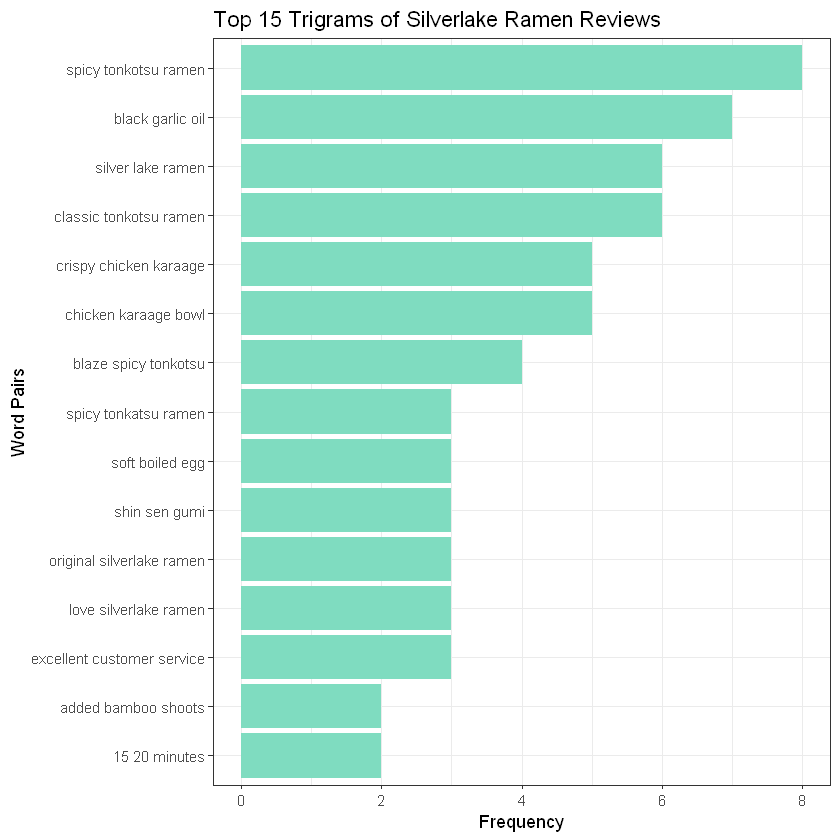

In [21]:
# Visual of Trigrams
trigrams_separated %>% 
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>%
  filter(!word3 %in% stop_words$word) %>%
  unite(word,word1, word2, word3, sep = " ") %>% 
  count(word, sort = TRUE)  %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  slice(1:15) %>%
  ggplot() + 
  geom_bar(aes(word, n), stat = "identity", fill = "#7FDCC0") +
  theme_minimal() +
  theme_bw() +
  coord_flip() +
  labs(title = "Top 15 Trigrams of Silverlake Ramen Reviews",
      x = "Word Pairs",
      y = "Frequency")



# Conclusion

The amount of information that can be gathered by these reviews is endless. Thanks to computational power and online resources this project has allowed me to practice my skills in extracting information from text data. Moving forward,  I want to learn more ways to better present text findinds as well as using text analysis to discover and investigate insights with impact that is much larger. Overall, even though much of the findings were to be expected it is reassuring to see how the data is in line with my previous inclination. The data shows why broth and pork are truly the driving factors for a tasty bowl of ramen!